In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dx(ym,xm,f):
    dxm=np.abs(xm[0,1]-xm[0,0])
    der=(np.roll(f,-1,axis=1)-np.roll(f,1,axis=1))/(2*dxm)
    der[:,0]=(f[:,1]-f[:,-2])/(2*dxm)
    der[:,-1] = der[:,0]
    return der
    
def dy(ym,xm,f):
    dym=np.abs(ym[1,0]-ym[0,0])
    der=(np.roll(f,-1,axis=0)-np.roll(f,1,axis=0))/(2*dym)
    der[0,:]=(f[1,:]-f[0,:])/(dym)
    der[1,:] = (f[-1,:]-f[-2,:])/(dym)
    return der

def ddy(ym,xm,f):
    dym=np.abs(ym[1,0]-ym[0,0])
    der=(np.roll(f,1,axis=0)- 2*f +np.roll(f,-1,axis=0))/(dym**2)
    der[0,:]=der[1,:]
    der[-1,:]=der[-2,:]
    return der

def ddx(ym,xm,f):
    dxm =np.abs(xm[0,1]-xm[0,0])
    der   = (np.roll(f,1,axis=1) - 2*f + np.roll(f,-1,axis=1)) / (dxm**2)
    der[:,0]=(f[:,1]-2*f[:,0]+f[:,-2])/(dxm**2)
    der[:,-1]=der[:,0]
    return der

def ddxy(ym,xm,f):
    df_dx = dx(ym,xm,f)
    ddf_dxy=dy(ym,xm,df_dx)
    return ddf_dxy

def detH(ddx,ddy,ddxy):
    derH=(ddx*ddy)#-(ddxy*ddxy)
    return derH

def K(dx,dy,ddx,ddy,ddxy):
    up=(dx*ddxy*dy)+(ddxy*dy*dx)-(dx*ddy*dx)-(ddx*dy*dy)
    down=((dx**2)+(dy**2))**2
    cur=-up/down
    return cur

def Lap(ddx,ddy):
    Laplacian= ddx+ddy
    return Laplacian

In [3]:
# pek
def Pek_max(f, theta, phi):
    pek_theta = []
    pek_phi = []
    pek_f = []
    
    # 周期性边界扩展，方便边界点处理
    f_temp = np.zeros((f.shape[0] + 2, f.shape[1] + 2))
    f_temp[1:-1, 0] = f[:, -1]
    f_temp[1:-1, 1:-1] = f
    f_temp[1:-1, -1] = f[:, 0]
    f_temp[0, 1:-1] = f[-1, :]
    f_temp[-1, 1:-1] = f[0, :]
    
    rows, cols = f.shape
    for r in range(rows):
        for c in range(cols):
            p = f_temp[r + 1, c + 1]
            neighbors = np.array([
                f_temp[r, c],     f_temp[r, c + 1],     f_temp[r, c + 2],
                f_temp[r + 1, c],                      f_temp[r + 1, c + 2],
                f_temp[r + 2, c], f_temp[r + 2, c + 1], f_temp[r + 2, c + 2]])
            
            if (p > neighbors).all():
                pek_theta.append(theta[r])
                pek_phi.append(phi[c])
                pek_f.append(f[r, c])
    
    return np.array(pek_theta), np.array(pek_phi), np.array(pek_f)

def Pek_min(f, theta, phi):
    pek_theta = []
    pek_phi = []
    pek_f = []
    [rf, cf] = np.where(f <= 70)
    f_temp = np.zeros((f.shape[0] + 2, f.shape[1] + 2))
    f_temp[1:-1, 0] = f[:, -1]
    f_temp[1:-1, 1:-1] = f
    f_temp[1:-1, -1] = f[:, 0]
    f_temp[0, :1:-1] = f[0, :]
    f_temp[-1, 1:-1] = f[-1, :]
    for r, c in zip(rf, cf):
        p = f_temp[r + 1, c + 1]
        pt = np.zeros(8)
        pt[0] = f_temp[r, c]
        pt[1] = f_temp[r, c + 1]
        pt[2] = f_temp[r, c + 2]
        pt[3] = f_temp[r + 1, c]
        pt[4] = f_temp[r + 1, c + 2]
        pt[5] = f_temp[r + 2, c]
        pt[6] = f_temp[r + 2, c + 1]
        pt[7] = f_temp[r + 2, c + 2]
        if (p < pt).all():
            pek_theta = np.append(pek_theta, theta[r])
            pek_phi = np.append(pek_phi, phi[c])
            pek_f = np.append(pek_f, f[r, c])

    return np.array(pek_theta), np.array(pek_phi), np.array(pek_f)

In [4]:
x = np.linspace(-2.5,2.5,500)
y = np.linspace(-2.5,2.5,250)
xm,ym=np.meshgrid(x,y)

def fm(x,y):
    return (x**3/3 - x) - (y**3/3 - y )
f=fm(xm,ym)
d_x=dx(ym,xm,f)
d_y=dy(ym,xm,f)
dd_x=ddx(ym,xm,f)
dd_y=ddy(ym,xm,f)
dd_xy=ddxy(ym,xm,f)

peky,pekx=[1,1,-1,-1],[1,-1,1,-1]

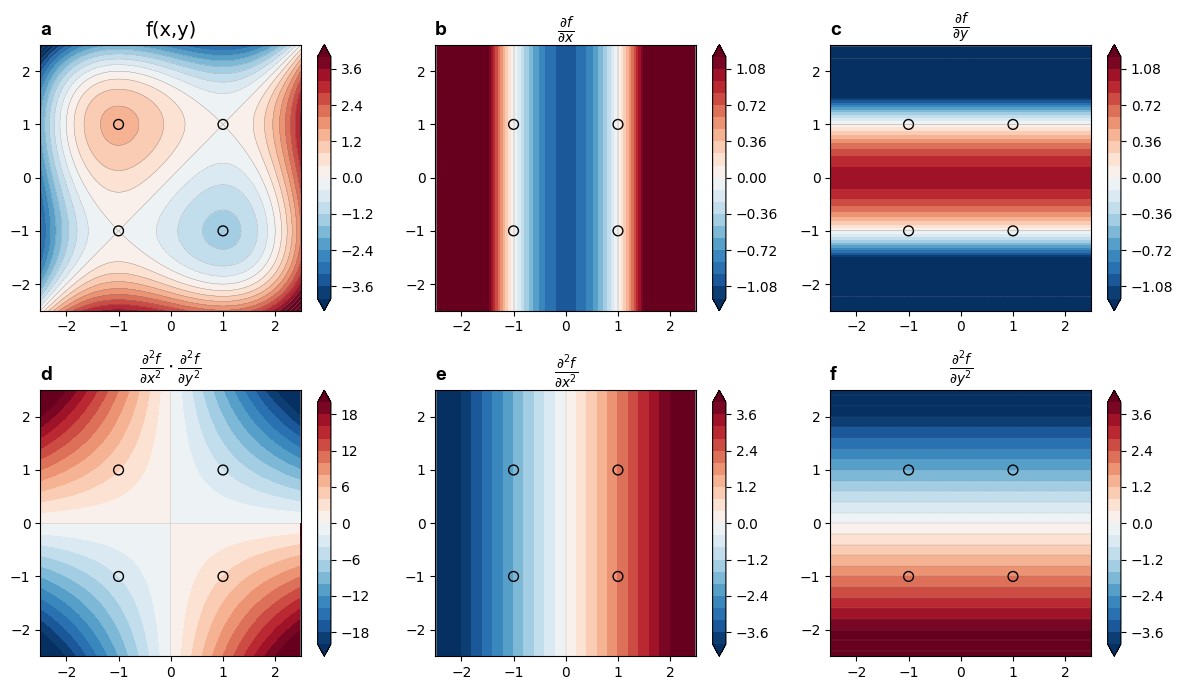

In [6]:
fontweight='bold'; fontname='Arial'; fontsize=14
plt.figure(figsize=(12,7))

# --- fig 1: f(x,y)
ax1=plt.subplot(2,3,1)
C=np.linspace(-4.,4.,21)
cb=plt.contourf(x,y,fm(xm,ym),C,cmap='RdBu_r',extend='both')
plt.contour(x,y,fm(xm,ym),levels=30,colors='gray',linewidths=.25)
plt.scatter(pekx,peky,facecolors='none',edgecolors='k',s=50,label='peaks')
plt.colorbar(cb)
plt.title('f(x,y)', fontsize=fontsize)
ax1.text(0,1.09,'a',transform=ax1.transAxes,fontsize=fontsize,fontweight=fontweight,fontname=fontname,va='top')

# --- fig 2: df/dx
ax2=plt.subplot(2,3,2)
C=np.linspace(-1.2,1.2,21)
cb=plt.contourf(x,y,d_x,C,cmap='RdBu_r',extend='both')
plt.contour(x,y,d_x,levels=35,colors='gray',linewidths=.25)
plt.scatter(pekx,peky,facecolors='none',edgecolors='k',s=50,label='peaks')
plt.colorbar(cb)
plt.title(r"$\frac{\partial f}{\partial x}$", fontsize=fontsize)
ax2.text(0,1.09,'b',transform=ax2.transAxes,fontsize=fontsize,fontweight=fontweight,fontname=fontname,va='top')

# --- fig 3: df/dy
ax3=plt.subplot(2,3,3)
C=np.linspace(-1.2,1.2,21)
cb=plt.contourf(x,y,d_y,C,cmap='RdBu_r',extend='both')
plt.contour(x,y,d_y,levels=35,colors='gray',linewidths=.25)
plt.scatter(pekx,peky,facecolors='none',edgecolors='k',s=50,label='peaks')
plt.colorbar(cb)
plt.title(r"$\frac{\partial f}{\partial y}$", fontsize=fontsize)
ax3.text(0,1.09,'c',transform=ax3.transAxes,fontsize=fontsize,fontweight=fontweight,fontname=fontname,va='top')

# --- fig 4: Hessian determinant
derH=detH(dd_x,dd_y,dd_xy)
ax4=plt.subplot(2,3,4)
C=np.linspace(-20.,20.,21)
cb=plt.contourf(x,y,derH,C,cmap='RdBu_r',extend='both')
plt.contour(x,y,derH,levels=35,colors='gray',linewidths=.15)
plt.scatter(pekx,peky,facecolors='none',edgecolors='k',s=50,label='peaks')
plt.colorbar(cb)
plt.title(r"$\frac{\partial^2 f}{\partial x^2} \cdot \frac{\partial^2 f}{\partial y^2}$", fontsize=fontsize)
ax4.text(0,1.09,'d',transform=ax4.transAxes,fontsize=fontsize,fontweight=fontweight,fontname=fontname,va='top')

# --- fig 5: d²f/dx²
ax5=plt.subplot(2,3,5)
C=np.linspace(-4,4,21)
cb=plt.contourf(x,y,dd_x,C,cmap='RdBu_r',extend='both')
plt.contour(x,y,dd_x,levels=30,colors='gray',linewidths=.15)
plt.scatter(pekx,peky,facecolors='none',edgecolors='k',s=50,label='peaks')
plt.colorbar(cb)
plt.title(r"$\frac{\partial^2 f}{\partial x^2}$", fontsize=fontsize)
ax5.text(0,1.09,'e',transform=ax5.transAxes,fontsize=fontsize,fontweight=fontweight,fontname=fontname,va='top')

# --- fig 6: d²f/dy²
ax6=plt.subplot(2,3,6)
C=np.linspace(-4,4,21)
cb=plt.contourf(x,y,dd_y,C,cmap='RdBu_r',extend='both')
plt.contour(x,y,dd_y,levels=30,colors='gray',linewidths=.15)
plt.scatter(pekx,peky,facecolors='none',edgecolors='k',s=50,label='peaks')
plt.colorbar(cb)
plt.title(r"$\frac{\partial^2 f}{\partial y^2}$", fontsize=fontsize)
ax6.text(0,1.09,'f',transform=ax6.transAxes,fontsize=fontsize,fontweight=fontweight,fontname=fontname,va='top')

plt.tight_layout()

# plt.savefig("D:\\work\\work_saddle\\Latex_saddle\\Fig\\New-color\\F2-Basic_Func.png",dpi=200)
